<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Удаление-неиформативных-признаков" data-toc-modified-id="Удаление-неиформативных-признаков-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Удаление неиформативных признаков</a></span></li><li><span><a href="#Поиск-аномалий" data-toc-modified-id="Поиск-аномалий-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Поиск аномалий</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li></ul></li></ul></li><li><span><a href="#Применение-сети-для-классификации." data-toc-modified-id="Применение-сети-для-классификации.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Применение сети для классификации.</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Проект для «Викишоп» с BERT

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка данных

In [1]:
!pip install ydata-profiling -U 
!pip install transformers -U
!pip install detoxify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.3/352.3 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 112.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ab88ee7a6ed7fea41f9b55ff434cd38a20da453ce7890534d7a3e0a8aeda209a
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
   

In [39]:
import time
import numpy as np
import pandas as pd
import seaborn as sns

from detoxify import Detoxify

from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, precision_score, recall_score
from tqdm import notebook

In [17]:
%matplotlib inline

In [18]:
from google.colab import drive
 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Загрузка данных

In [19]:
%cd drive/MyDrive/Colab\ Notebooks

[Errno 2] No such file or directory: 'drive/MyDrive/Colab Notebooks'
/content/drive/MyDrive/Colab Notebooks


In [20]:
try:
    data = pd.read_csv('toxic_comments.csv')
except:
    data = pd.read_csv('/datasets/toxic_comments.csv')
data.head(10)

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0
5,5,"""\n\nCongratulations from me as well, use the ...",0
6,6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
7,7,Your vandalism to the Matt Shirvington article...,0
8,8,Sorry if the word 'nonsense' was offensive to ...,0
9,9,alignment on this subject and which are contra...,0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


### Предобработка данных

**Изменения имён переменных** и **обработка пропусков** не требуются. **Обработка дубликатов** не требуется, так как полных дубликатов нет.

#### Удаление неиформативных признаков

Колонка Unnamed: 0 согласно отчёту ydataprofilling имеет 159292 уникальных значений - это столько же, сколько и строк в данных. То есть все значения этой переменной - различны, они не помогут моделям. Удалим эту колонку.

In [22]:
data['Unnamed: 0'].head()

0    0
1    1
2    2
3    3
4    4
Name: Unnamed: 0, dtype: int64

In [23]:
data = data.drop(columns=['Unnamed: 0'])
data.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [24]:
data['toxic'] = data['toxic'].astype('int8')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int8  
dtypes: int8(1), object(1)
memory usage: 1.4+ MB


#### Поиск аномалий

In [26]:
data['text'].max()

"\ufeffSensual Pleasures of the MindItalic text\n\nThere are endless creative ways to provoke and capture sensual feelings. Money can’t buy it, you can’t see it or hold it, outer\npackaging offers no competition for it and no grandiose flash of materialistic presence can incite it. Sensuality in it’s truest sense can only be felt within.  It is provoked by and through the power and brilliance of the mind. It is born there and lives there.\n\nSince it is a feeling rather than a physical event, it is more difficult to achieve and maintain than might be found with other less deeply rooted sexual experiences.  Knowledge, intuition and creativity are the tools necessary to discover where it lives and how to awaken it, what it takes to stimulate it and how to nurture it so it will grow. A conscientious partner can create a need and cravings simply by using the power of the mind.    \n\nAll of this offers new meaning to the old adage about the mind being a terrible thing to waste. There are h

In [27]:
data['text'].min()

'  """'

Будем считать, что любой тексты, даже самые короткие стоит рассматривать, потому что, возможно, они тоже несут какой-то смысл. Не будем удалять никаких строчек

#### Борьба с дисбалансом

In [28]:
data['toxic'].value_counts() / data['toxic'].shape[0]

0    0.898388
1    0.101612
Name: toxic, dtype: float64

В данных наблюдается достаточно сильный дисбаланс. С ним бороться не будем. Обучать модели не будем, только применять обученные сети.

In [29]:
model = Detoxify('original', device='cuda')

In [30]:
model.device

'cuda'

In [31]:
lst_of_texts = data['text'].values.tolist()

## Применение сети для классификации.

In [32]:
%%time

batch_size = 50
results = []
for i in notebook.tqdm(range(0, len(lst_of_texts), batch_size)):
    batch = lst_of_texts[i:i+batch_size]
    results.append(model.predict(batch)['toxicity'])

  0%|          | 0/3186 [00:00<?, ?it/s]

CPU times: user 1h 17min 43s, sys: 7.74 s, total: 1h 17min 51s
Wall time: 1h 19min 25s


In [36]:
res = [i for sublst in results for i in sublst]

In [71]:
data['pred_proba'] = res
data['pred_label'] = np.where(data['pred_proba'] > 0.45, 1, 0)

print("F1 SCORE: ", f1_score(data['toxic'], data['pred_label']))
print("ROC AUC SCORE: ", roc_auc_score(data['toxic'], data['pred_proba']))

F1 SCORE:  0.9429627099698823
ROC AUC SCORE:  0.9980118355867821


In [72]:
precision_score(data['toxic'], data['pred_label'])

0.9478184882341926

In [73]:
recall_score(data['toxic'], data['pred_label'])

0.9381564314839985

In [74]:
CM_labels = ['TN', 'FP', 'FN', 'TP']
CM = list(confusion_matrix(data['toxic'], data['pred_label']).reshape(-1))
CMatr = [CM_labels[i] + '=' + str(CM[i]) for i in range(len(CM))]
labels = np.asarray(CMatr).reshape(2, 2)
labels

array([['TN=142270', 'FP=836'],
       ['FN=1001', 'TP=15185']], dtype='<U9')

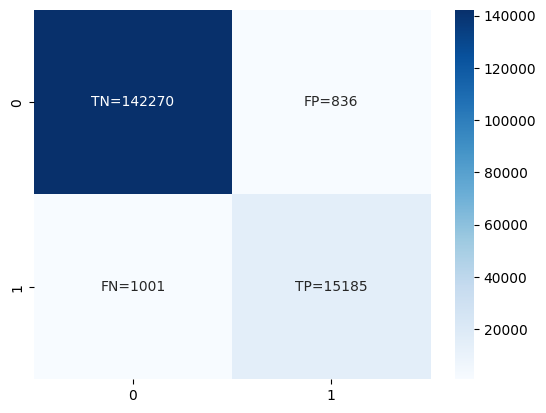

In [75]:
sns.heatmap(confusion_matrix(data['toxic'],  data['pred_label']), 
            annot=labels, fmt='4', cmap='Blues');

Расшифровка матрицы ошибок:
 - Из всех комментариев, которые модель классифицировала как токсичные (TP + FP = 15639), найдено 15185 (TP) действительно токсичных. 836 классифицированы токсичными по ошибке (FP).
 - Из всех действительно токсичных (TP + FN = 16186), верно классифицировано 15185. 1001 токсичных комментариев были не замечены (FN)

## Выводы

На всех данных были получены следующие результаты с помощью модели Detoxify:
- F1 SCORE:  0.943
- ROC AUC SCORE:  0.998
- Precision: 0.948
- Recall: 0.938


Это очень высокая точность предсказания, которая поможет легко определить токсичный комментарий - и отправить его на модерацию, а также данная модель будет иметь очень малый процент ложных срабатываний.

 - Из всех комментариев, которые модель классифицировала как токсичные (TP + FP = 15639), найдено 15185 (TP) действительно токсичных. 836 классифицированы токсичными по ошибке (FP).
 - Из всех действительно токсичных (TP + FN = 16186), верно классифицировано 15185. 1001 токсичных комментариев были не замечены (FN)


Данные метрики и статистики были получены при пороге классификации = 0.45.
Если же необходимо повысить чувствительность классификатора, то порог необходимо будет понизить. Если же заказчик посчитает, что надо уменьшить количество ложных срабатываний, тогда надо сделать модель чуть менее строгой - и повысить порог классификации.